In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

In [148]:
def where(df: pd.DataFrame, col1: str, col2: str, where: str, val: float, c: str) -> None:
    df = df.loc[df[where] == val]
    df = df.groupby(col1, as_index = False)[col2].agg([np.mean, np.std])
    df = df.reset_index()
    df.columns = [col1, 'mean', 'std']
    
    plt.plot(df[col1], df['mean'], label = fr'$Class {val}$', color = c, lw = 2)
    plt.fill_between(df[col1], df['mean']-df['std'], df['mean'] + df['std'], alpha = .4, color = c)
    
def where_nostd(df: pd.DataFrame, col1: str, col2: str, where: str, val: float, c: str) -> None:
    df = df.loc[df[where] == val]
    df = df.groupby(col1, as_index = False)[col2].agg([np.mean, np.std])
    df = df.reset_index()
    df.columns = [col1, 'mean', 'std']
    
    plt.plot(df[col1], df['mean'], label = fr'$Class {val}$', color = c, lw = 2)
    #plt.fill_between(df[col1], df['mean']-df['std'], df['mean'] + df['std'], alpha = .4, color = c)
    
def no_where(df: pd.DataFrame, col1: str, col2: str, c: str) -> None:
    df = df.groupby(col1, as_index = False)[col2].agg([np.mean, np.std])
    df = df.reset_index()
    df.columns = [col1, 'mean', 'std']
    
    plt.plot(df[col1], df['mean'], label = fr'$\{col1}$', color = c, lw = 2)
    plt.fill_between(df[col1], df['mean']-df['std'], df['mean'] + df['std'], alpha = .4, color = c)
     
    
def no_where_nostd(df: pd.DataFrame, col1: str, col2: str, c: str) -> None:
    df = df.groupby(col1, as_index = False)[col2].agg([np.mean, np.std])
    df = df.reset_index()
    df.columns = [col1, 'mean', 'std']

    plt.plot(df[col1], df['mean'], label = fr'Mean', color = c, lw = 1, alpha = .3)
    #plt.fill_between(df[col1], df['mean']-df['std'], df['mean'] + df['std'], alpha = .4, color = c)
    
def scatter(df: pd.DataFrame, col1: str, col2: str, color: str) -> None:
    a, b, c, d, e = np.polyfit(df[col1], df[col2], deg = 4)
    
    xseq = np.linspace(0, max(df[col1]), num=100)

    plt.scatter(df[col1], df[col2], label = fr'$\{col1}$', color = color, marker = "x", alpha = .5)
    plt.plot(xseq, a * xseq ** 4 + b * xseq ** 3 + c * xseq ** 2 + d * xseq + e, color = color, lw = 4)
    #plt.fill_between(df[col1], df['mean']-df['std'], df['mean'] + df['std'], alpha = .4, color = c)
    
    
def scatter_where(df: pd.DataFrame, col1: str, col2: str, where: str, val: float, color: str) -> None:
    df = df.loc[df[where] == val]
    vals, r, _, _, _  = np.polyfit(df[col1], df[col2], deg = 3, full = True)
    a, b, c, d = vals
    
    xseq = np.linspace(min(df[col1]), max(df[col1]), num=100)
        
    lab = ["Class I", "Class II", "Class III", "Class IV"]
    plt.scatter(np.array(df[col1]), np.array(df[col2]), label = lab[val - 1], color = color, marker ="x", alpha = .7)
    plt.plot(xseq, a * xseq ** 3 + b * xseq ** 2 + c * xseq + d, color = color, lw = 3)
    #plt.fill_between(df[col1], df['mean']-df['std'], df['mean'] + df['std'], alpha = .4, color = c)
    
def reg(df: pd.DataFrame, col1: str, col2: str, color: str) -> None:
    vals, r, _, _, _ = np.polyfit(df[col1], df[col2], deg = 3, full = True)
    
    a, b, c, d = vals
    
    print(a, b, c, d, r)
    xseq = np.linspace(min(df[col1]), max(df[col1]), num=100)

    plt.plot(xseq, a * xseq ** 3 + b * xseq ** 2 + c * xseq + d, color = color, lw = 4, label = "All Classes")
    
    

[38.49147081428564, 23.31500216318662, 21.82166954707975, 20.795531902425907, 20.78166990306056, 20.68925466331113, 20.679520451444468, 20.66900350008043, 20.64050557639077, 20.628857194652003, 20.604399195496313]


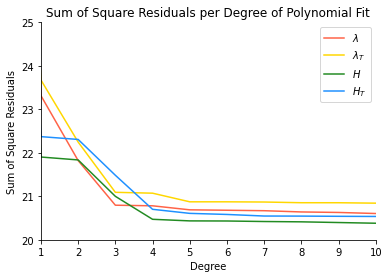

In [160]:
def residual(df: pd.DataFrame, col1: str, col2: str, deg: int) -> None:
    vals, r, _, _, _ = np.polyfit(df[col1], df[col2], deg = deg, full = True)
    
    return r[0]
    
    
    
x = []
yl = []
ylt = []
yh = []
yht = []
    
df = pd.read_excel("AllResults.xls") 

for i in range(0, 11):
    x.append(i)
    yl.append(residual(df,"lambda", "Fitness", i))
    ylt.append(residual(df,"lambda_t", "Fitness", i))
    yh.append(residual(df,"H", "Fitness", i))
    yht.append(residual(df,"H_t", "Fitness", i))
    

print(yl)

fig = plt.figure()
fig.set_size_inches(6, 4)
plt.axis([1, 10, 20, 25])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.plot(x, yl, label = r"$\lambda$", color = "tomato")
plt.plot(x, ylt, label = r"$\lambda_T$", color = "gold")
plt.plot(x, yh, label = r"$H$", color = "forestgreen")
plt.plot(x, yht, label = r"$H_T$", color = "dodgerblue")

plt.title("Sum of Square Residuals per Degree of Polynomial Fit")
plt.xlabel("Degree")
plt.ylabel("Sum of Square Residuals")

plt.legend()
plt.show()
    
    

-1.637206858494611 1.9622970211983115 -0.01701761750055936 0.13864131587360667 [20.7955319]


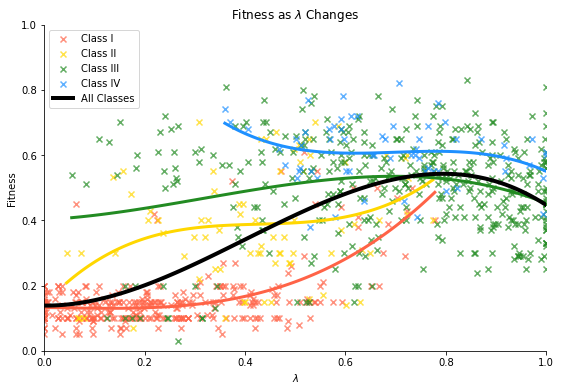

-1.9802925674836687 2.309712983202304 -0.08965710580107597 0.14684074371700964 [21.09195452]


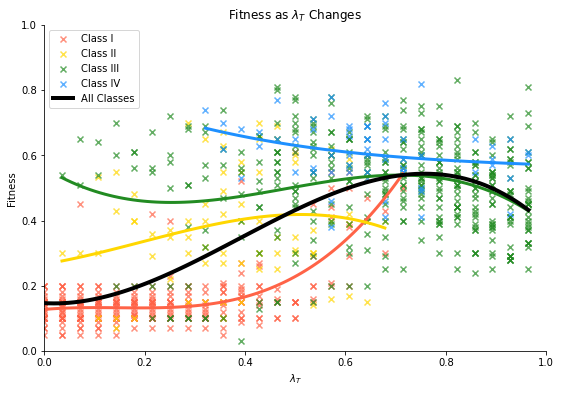

-0.049909098035510906 0.2532226805678096 -0.19722661017386736 0.16917194379473735 [20.99992975]


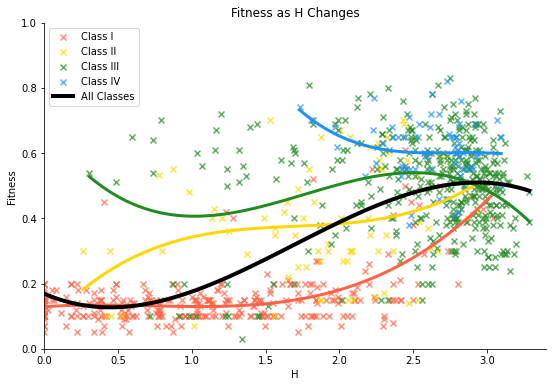

-0.04712961217525269 0.24598985464994158 -0.2034405145150553 0.17869941803581113 [21.48402633]


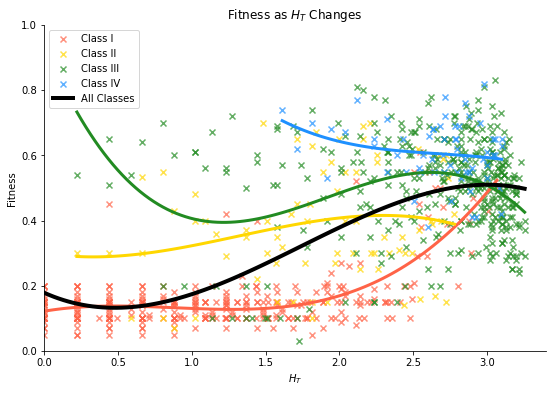

Text(0, 0.5, 'Fitness')

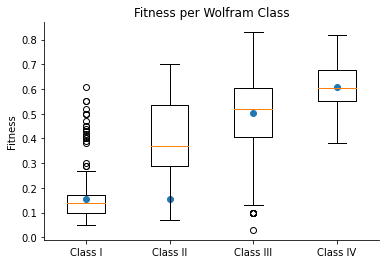

In [150]:
df = pd.read_excel("AllResults.xls")

"""LAMBDA"""


fig = plt.figure()
fig.set_size_inches(9, 6)
plt.axis([0, 1, 0, 1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


scatter_where(df, "lambda", "Fitness","Class", 1, "tomato")
scatter_where(df, "lambda", "Fitness","Class", 2, "gold")
scatter_where(df, "lambda", "Fitness","Class", 3, "forestgreen")
scatter_where(df, "lambda", "Fitness","Class", 4, "dodgerblue")

reg(df, "lambda", "Fitness", "black")

plt.title(r"Fitness as $\lambda$ Changes")
plt.xlabel(r"$\lambda$")
plt.ylabel("Fitness")


plt.legend()
plt.show()

"""LAMBDA_T"""

fig = plt.figure()
fig.set_size_inches(9, 6)
plt.axis([0, 1, 0, 1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


scatter_where(df, "lambda_t", "Fitness","Class", 1, "tomato")
scatter_where(df, "lambda_t", "Fitness","Class", 2, "gold")
scatter_where(df, "lambda_t", "Fitness","Class", 3, "forestgreen")
scatter_where(df, "lambda_t", "Fitness","Class", 4, "dodgerblue")

reg(df, "lambda_t", "Fitness", "black")

plt.title(r"Fitness as $\lambda_T$ Changes")
plt.xlabel(r"$\lambda_T$")
plt.ylabel("Fitness")


plt.legend()
plt.show()

"""H"""

fig = plt.figure()
fig.set_size_inches(9, 6)
plt.axis([0, 3.4, 0, 1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


scatter_where(df, "H", "Fitness","Class", 1, "tomato")
scatter_where(df, "H", "Fitness","Class", 2, "gold")
scatter_where(df, "H", "Fitness","Class", 3, "forestgreen")
scatter_where(df, "H", "Fitness","Class", 4, "dodgerblue")



reg(df, "H", "Fitness", "black")

plt.title(r"Fitness as H Changes")
plt.xlabel(r"H")
plt.ylabel("Fitness")


plt.legend()
plt.show()
"""H_T"""

fig = plt.figure()
fig.set_size_inches(9, 6)
plt.axis([0, 3.4, 0, 1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


scatter_where(df, "H_t", "Fitness","Class", 1, "tomato")
scatter_where(df, "H_t", "Fitness","Class", 2, "gold")
scatter_where(df, "H_t", "Fitness","Class", 3, "forestgreen")
scatter_where(df, "H_t", "Fitness","Class", 4, "dodgerblue")

reg(df, "H_t", "Fitness", "black")

plt.title(r"Fitness as $H_T$ Changes")
plt.xlabel(r"$H_T$")
plt.ylabel("Fitness")

plt.legend()
plt.show()

"""Box"""


fig = plt.figure()
fig.set_size_inches(6,4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

lab = ["Class I", "Class II", "Class III", "Class IV"]
plt.boxplot([ df.loc[df["Class"] == 1]["Fitness"] , df.loc[df["Class"] == 2]["Fitness"], df.loc[df["Class"] == 3]["Fitness"], df.loc[df["Class"] == 4]["Fitness"]], labels = lab)
plt.scatter([1,2,3,4],
            [ np.mean(df.loc[df["Class"] == 1]["Fitness"]), np.mean(df.loc[df["Class"] == 1]["Fitness"]),
              np.mean(df.loc[df["Class"] == 3]["Fitness"]), np.mean(df.loc[df["Class"] == 4]["Fitness"])])
plt.title(r"Fitness per Wolfram Class")
plt.ylabel("Fitness")


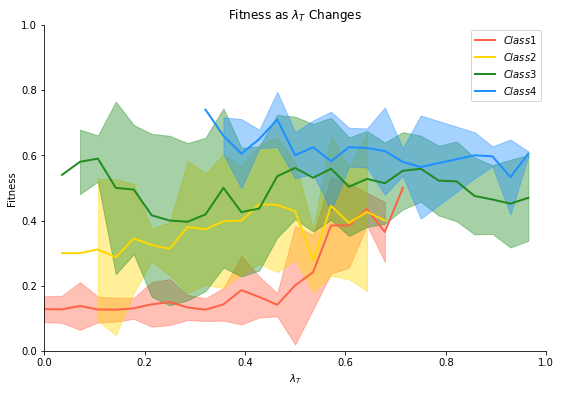

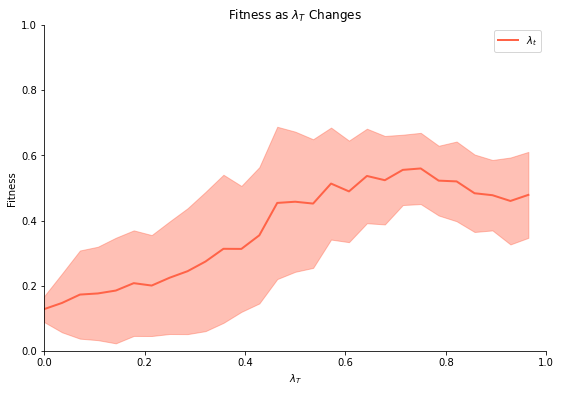

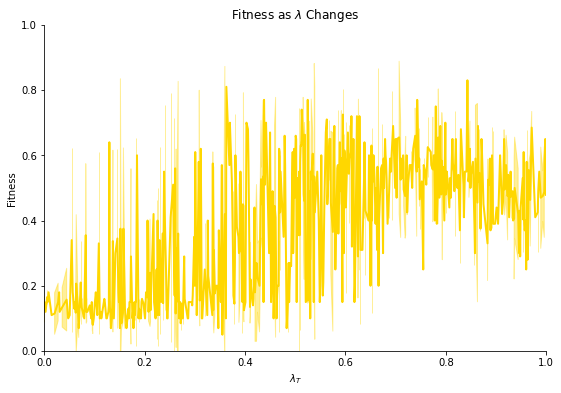

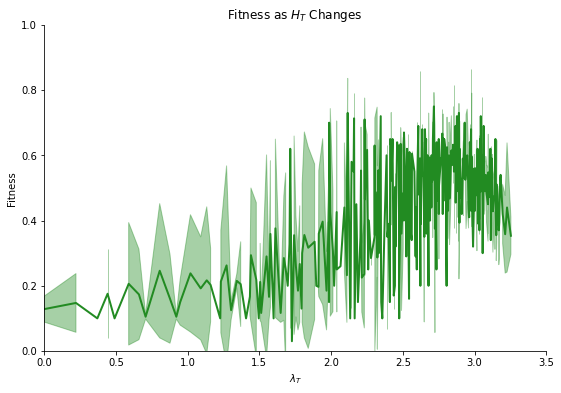

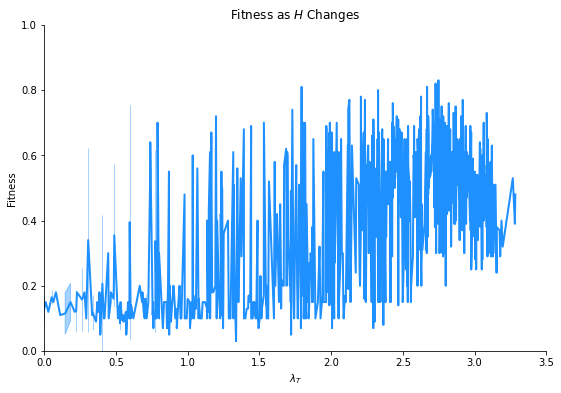

In [139]:
fig = plt.figure()
fig.set_size_inches(9, 6)
plt.axis([0, 1, 0, 1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


where(df, "lambda_t", "Fitness","Class", 1, "tomato")
where(df, "lambda_t", "Fitness","Class", 2, "gold")
where(df, "lambda_t", "Fitness","Class", 3, "forestgreen")
where(df, "lambda_t", "Fitness","Class", 4, "dodgerblue")


plt.title(r"Fitness as $\lambda_T$ Changes")
plt.xlabel(r"$\lambda_T$")
plt.ylabel("Fitness")


plt.legend()
plt.show()

fig = plt.figure()
fig.set_size_inches(9, 6)
plt.axis([0, 1, 0, 1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


no_where(df, "lambda_t", "Fitness", "tomato")


plt.title(r"Fitness as $\lambda_T$ Changes")
plt.xlabel(r"$\lambda_T$")
plt.ylabel("Fitness")


plt.legend()
plt.show()


fig = plt.figure()
fig.set_size_inches(9, 6)
plt.axis([0, 1, 0, 1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


no_where(df, "lambda", "Fitness", "gold")


plt.title(r"Fitness as $\lambda$ Changes")
plt.xlabel(r"$\lambda_T$")
plt.ylabel("Fitness")

plt.show()

fig = plt.figure()
fig.set_size_inches(9, 6)
plt.axis([0, 3.5, 0, 1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


no_where_nostd(df, "H_t", "Fitness", "forestgreen")


plt.title(r"Fitness as $H_T$ Changes")
plt.xlabel(r"$\lambda_T$")
plt.ylabel("Fitness")

plt.show()

fig = plt.figure()
fig.set_size_inches(9, 6)
plt.axis([0, 3.5, 0, 1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


no_where(df, "H", "Fitness", "dodgerblue")


plt.title(r"Fitness as $H$ Changes")
plt.xlabel(r"$\lambda_T$")
plt.ylabel("Fitness")

plt.show()